$$ Advanced Machine Learning Practical I $$

* Objective:
Catch up with the overview of the covered material of Machine Learning. It is important to understand the difference of Logistic regression versus the Support Vector Machine.

##### Exercise 1: __Theory__

* Describe the Logistic Regression\
Logistic regression is a Machine Learning algorithm which converts input data into a binary representation such as *yes* or *no* .
It predicts a dependant variable with the help of all the independant one (features). A use case might be whether a student will pass or fail an exam ? or someone will win or lose the game etc.

![Logistic Regression Illustration](./images/lr.png)

* Describe the Support Vector Machine\
SVM (*S*upport *V*ector *M*achine) is a supervised machine learning algorithm for classification model. This also means that it takes input data then turns it into different categories.
They are fast, easily trained discriminators. They are designed to estimate the optimal seperating hyperplane for classifier (See SVM Illustration)

![SVM Illustration](./images/svm.png)

*SVMs are usually implemented as binary classifiers, are in many ways superior to neural nets, and may be grouped in a decision tree to arrive at a multi-class discriminator. SVMs are much less susceptible to over-training than neural nets, allowing for a much more hands-off training process that is easily deployable and scalable. A multiclass implementation for an SVM is also possible – where multiple hyperplanes are optimized simultaneously.* ( [Support Vector Machine Implementations for Classification & Clustering](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-S2-S4) )

* Explain the word __regularization__ and justify its importance\
__Regularization__ is a machine learning technique which is used to calibrate a model during training while tweaking and adjusting the loss function in order to prevent *overfitting* or *underfitting*.

</ul>


##### Exercise 2: __Data Preprocessing__
a. Download dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read data and save in a pandas dataframe
# data source: https://www.kaggle.com/code/vikramb/mobile-price-prediction
train_d = pd.read_csv("./data/train.csv")

In [3]:
# Look at first row of the train_d
train_d.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


b. Pre-process the data

In [4]:
# Analize the data
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

* Observation on the data:\
We can say that there is no *null* value for each and every column of the train dataset. Also, all the fields are numeric.

In [5]:
# Inspect data
train_d.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


__All the 20 columns have 2000 rows therefore none has a missing value.__

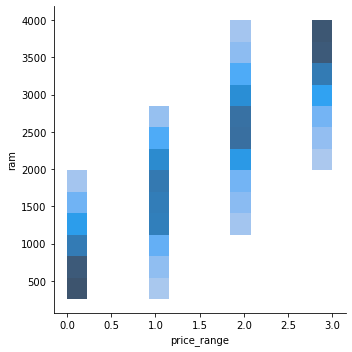

In [6]:
# Ram / price range
sns.displot(data=train_d, y="ram", x="price_range")

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

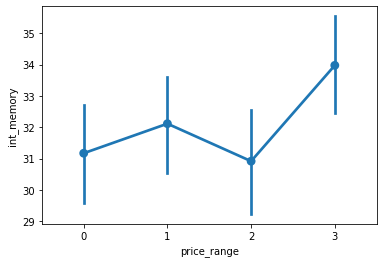

In [7]:
# Internal Memory / price range
sns.pointplot(data=train_d, y="int_memory", x="price_range")

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

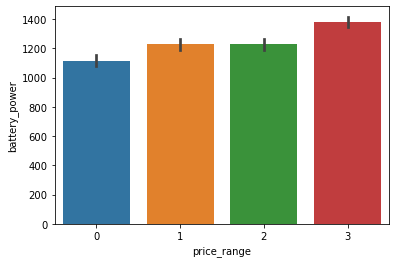

In [8]:
# Battery power / price range
sns.barplot(x="price_range", y="battery_power", data=train_d)

**Note: All our feature are numerical and somehow relevant to the predicted value**

* Splitting Data

In [18]:
# Import Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm

##### Exercise 2: __Learning Modelling__

1. Logistic Regression

In [15]:
# Use StandarScaler to avoid convergence warning
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [10]:
# Isolate the features from the label/target
# 1. Features
X = train_d.drop("price_range", axis=1)
# 2. Target/Label
y =  train_d["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [16]:
# Train the model with standard scaler applied to train_data
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [17]:
# apply scaling on testing data, without leaking training data.
pipe.score(X_test, y_test)

0.946969696969697

2. Support Vector Machine

In [20]:
SVC = svm.SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [21]:
clf.score(X_test, y_test)

0.8651515151515151

Algorithm | Logistic Regression | SVM |
----------|---------------------|-----|
Score     | __0.95__            | 0.86|

Finally, we can see that the Logistic Regression regression is more adapted to this type of dataset where it has resulted with higher score of __0.95__.

**For this particular dataset, the reason behind logistic regression having higher score might be because of the relation between the number of features and training examples which are low**

" *1. If n is large (1–10,000) and m is small (10–1000) : use logistic regression or SVM with a linear kernel.*

*2. If n is small (1–10 00) and m is intermediate (10–10,000) : use SVM with (Gaussian, polynomial etc) kernel*

*3. If n is small (1–10 00), m is large (50,000–1,000,000+): first, manually add more features and then use logistic regression or SVM with a linear kernel* "   

[Logistic Regression Vs Support Vector Machines (SVM)](https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16)
